<a href="https://colab.research.google.com/github/vijaygwu/algorithms/blob/main/498_Diagonal_Traverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given an m x n matrix mat, return an array of all the elements of the array in a diagonal order.

**Example 1:**

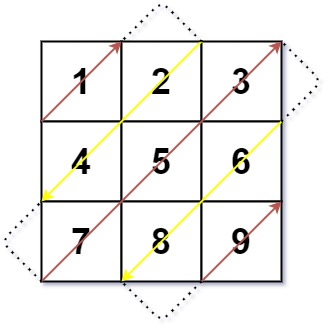

Input: mat = [[1,2,3],[4,5,6],[7,8,9]]
Output: [1,2,4,7,5,3,6,8,9]

**Example 2:**

Input: mat = [[1,2],[3,4]]
Output: [1,2,3,4]


**Constraints:**

m == mat.length
n == mat[i].length
1 <= m, n <= 104
1 <= m * n <= 104
-105 <= mat[i][j] <= 105



---

## 1 / Problem recap  
“Diagonal order” (LeetCode 498) means we start at **matrix[0][0]**, zip up‑right, then down‑left, then up‑right again, and so on, dumping the values into one flat list.

```
Input (3 × 4):

1  2  3  4
5  6  7  8
9 10 11 12

Desired output:
[1,2,5,9,6,3,4,7,10,11,8,12]
```

---

## 2 / Variables at a glance

| Name | Meaning |
|------|---------|
| `N`, `M` | rows and cols |
| `result` | final flattened traversal |
| `intermediate` | scratchpad for one diagonal |
| `d` | diagonal index (0‑based); there are `N + M − 1` of them |
| `r`, `c` | starting row/col for that diagonal |

---

## 3 / Core loop dissected

```python
for d in range(N + M - 1):
    intermediate.clear()
```
We’re going to hit *every* diagonal exactly once. There are `rows + cols – 1` of them.

### (a) Pick the correct **starting cell** for the current diagonal

```python
r, c = 0 if d < M else d - M + 1,  d if d < M else M - 1
```

* Two cases:
  * While we’re still in the top row (`d < M`), the diagonal starts at `(r=0, c=d)`.
  * Once we’ve slid past the right edge, we pin to the last column (`c=M‑1`) and let the row index keep increasing (`r = d - M + 1`).

Visually it’s like dropping a ruler against the matrix and moving it one step right each time until you run out of top‑row cells, then you start sliding down the rightmost column.

### (b) Walk **down‑left** until we fall off the matrix

```python
while r < N and c > -1:
    intermediate.append(matrix[r][c])
    r += 1
    c -= 1
```

Why down‑left? Because we always *collect* a diagonal in the *same* physical direction; we’ll decide later whether to reverse the collected slice.

### (c) Flip every other diagonal

```python
if d % 2 == 0:
    result.extend(intermediate[::-1])  # even d → reverse
else:
    result.extend(intermediate)        # odd d → keep as‑is
```

*Odd‑even trick*: the pattern is **up‑right**, **down‑left**, **up‑right**, …  
Since we physically walked **down‑left**, we must reverse the slice to get the up‑right order on even‑numbered passes.

---

## 4 / Tiny dry‑run (3 × 3)

```
d=0  start(0,0) collect [1]            even → reverse → [1]
d=1  start(0,1) collect [2,4]          odd  → keep    → [2,4]
d=2  start(0,2) collect [3,5,7]        even → rev     → [7,5,3]
d=3  start(1,2) collect [6,8]          odd  → keep    → [6,8]
d=4  start(2,2) collect [9]            even → rev     → [9]
```

Glue them together: **[1,2,4,7,5,3,6,8,9]** – matches the spec.

---

## 5 / Complexity

| Measure | Cost |
|---------|------|
| Time    | `O(N × M)` – every element visited exactly once |
| Extra space | `O(min(N,M))` for `intermediate` (worst‑case one diagonal) – plus `O(N × M)` for `result`, which you can’t avoid because that *is* the output |

---

### TL;DR
1. March over `N + M – 1` diagonals.  
2. Compute each diagonal’s start `(r,c)` in **O(1)**.  
3. Walk down‑left, pushing values to a temp list.  
4. Reverse the temp list on even diagonals to achieve the up‑right ordering.  
5. Append to `result`.  



In [8]:
from typing import List

class Solution:
    def findDiagonalOrder(self, matrix: List[List[int]]) -> List[int]:
        # Handle empty matrix case
        if not matrix or not matrix[0]:
            return []

        # Get dimensions of the matrix
        N, M = len(matrix), len(matrix[0])

        # Initialize result and intermediate lists
        result = []
        intermediate = []

        # Iterate through all diagonals
        for d in range(N + M - 1):
            # Clear the intermediate list for new diagonal
            intermediate.clear()

            # Set starting position for this diagonal
            # If d < M, we start from first row (r=0) and column d
            # Otherwise, we start from row (d-M+1) and last column (M-1)
            r, c = 0 if d < M else d - M + 1, d if d < M else M - 1

            # Traverse the diagonal (move down and left)
            while r < N and c > -1:
                intermediate.append(matrix[r][c])
                r += 1
                c -= 1

            # For even-indexed diagonals, reverse the order (up-right direction)
            # For odd-indexed diagonals, keep the order (down-left direction)
            if d % 2 == 0:
                result.extend(intermediate[::-1])  # [::-1] reverses the list
            else:
                result.extend(intermediate)

        return result

In [9]:
def test_findDiagonalOrder():
    # Create an instance of the Solution class
    solution = Solution()

    # Test Case 1: Standard 3x3 matrix
    matrix1 = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
    expected1 = [1, 2, 4, 7, 5, 3, 6, 8, 9]
    result1 = solution.findDiagonalOrder(matrix1)
    print(f"Test Case 1: {'Passed' if result1 == expected1 else 'Failed'}")
    print(f"Expected: {expected1}")
    print(f"Result:   {result1}")

    # Test Case 2: Empty matrix
    matrix2 = []
    expected2 = []
    result2 = solution.findDiagonalOrder(matrix2)
    print(f"Test Case 2: {'Passed' if result2 == expected2 else 'Failed'}")

    # Test Case 3: Non-square matrix
    matrix3 = [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ]
    expected3 = [1, 2, 5, 6, 3, 7, 4, 8]
    result3 = solution.findDiagonalOrder(matrix3)
    print(f"Test Case 3: {'Passed' if result3 == expected3 else 'Failed'}")
    print(f"Expected: {expected3}")
    print(f"Result:   {result3}")

    # Test Case 4: Single element matrix
    matrix4 = [[42]]
    expected4 = [42]
    result4 = solution.findDiagonalOrder(matrix4)
    print(f"Test Case 4: {'Passed' if result4 == expected4 else 'Failed'}")

# Run the tests
test_findDiagonalOrder()

Test Case 1: Passed
Expected: [1, 2, 4, 7, 5, 3, 6, 8, 9]
Result:   [1, 2, 4, 7, 5, 3, 6, 8, 9]
Test Case 2: Passed
Test Case 3: Failed
Expected: [1, 2, 5, 6, 3, 7, 4, 8]
Result:   [1, 2, 5, 6, 3, 4, 7, 8]
Test Case 4: Passed
